# EDA

This is just a template for you to use, inorder to perform EDA. Feel free to add as much as lines of code, explanation needed and perform a<br> detailed EDA on the given data!

## Understand your data

For gaining insights about your data, it is necessary to understand your dataset and what it is about. Thus, what you need to do is

- to ready in your data
- to check how your dataset looks like
- to check what your columns and rows are about

**Use your domain knowledge to understand tha data (or the internet)**

### Task

1. Download the following dataset (winemag-data-130k-v2.csv) from [kaggle](https://www.kaggle.com/datasets/zynicide/wine-reviews?select=winemag-data-130k-v2.csv).

In [23]:
#Load the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Load the data
df = pd.read_csv(r'C:\Users\sruth\Documents\Greenbootcamps\DS_First_EDA_Project\data\winemag-data-130k-v2.csv')




2. Read in the data

In [24]:
#View the data
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


3. Explore the dataset (Helpful functions might be df.shape, df.info(), df.columns

In [25]:
df.shape

(129971, 14)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [27]:
df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

4. Write a short summary what you have learned about the dataset so far

In [ ]:
#Each row in the DataFrame represents a wine review — including information about the wine, its origin, reviewer, and score.
#This dataframe having 129971 rows and 14 columns
#Most of the columns are string datatype
#only 5 columns doesn't have any null values


Go on with exploring the data and see what all information you can gather from it, by doing an EDA!

In [28]:
df.isnull().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [29]:

# For object/string columns, fill NaN with 'Unknown'
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna('Unknown')

In [30]:
# For numeric columns, fill NaN with 0
for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df[col].fillna(0)

In [32]:
df.isnull().sum()

Unnamed: 0               0
country                  0
description              0
designation              0
points                   0
price                    0
province                 0
region_1                 0
region_2                 0
taster_name              0
taster_twitter_handle    0
title                    0
variety                  0
winery                   0
dtype: int64

In [31]:
df.duplicated().any()

np.False_

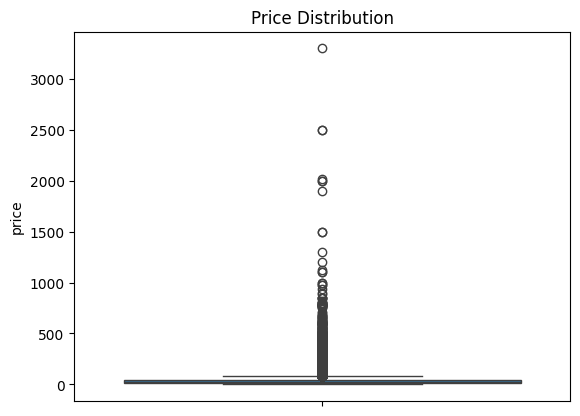

In [ ]:
#Univariate Analysis
sns.boxplot(y=df['price'])
plt.title('Price Distribution')
plt.show()

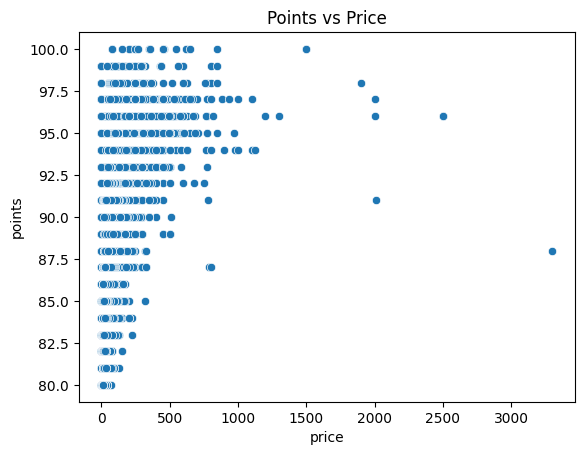

In [35]:
#Bivariate Analysis

sns.scatterplot(x='price', y='points', data=df)
plt.title('Points vs Price')
plt.show()

In [36]:
#EDA correlation
df1 = df.copy()
df1 = df1.select_dtypes(include=['number'])
df1
df1.corr()

,Unnamed: 0,points,price
Unnamed: 0,1.000000,0.007124,0.005851
points,0.007124,1.000000,0.385438
price,0.005851,0.385438,1.000000


<Axes: >

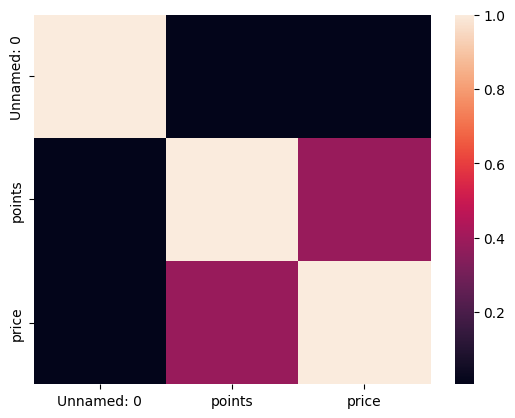

In [37]:
#Correlation plot
sns.heatmap(df1.corr())